In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

In [22]:
data_dir = 'caltech-101'
# meilleur avec 32 apparemment
batch_size = 32
img_height = 180
img_width = 180

In [13]:
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

validation_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names = train_dataset.class_names
num_classes = len(class_names)

Found 8242 files belonging to 100 classes.
Using 6594 files for training.
Found 8242 files belonging to 100 classes.
Using 1648 files for validation.


In [14]:
# pas sûr que ça aide

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
epochs = 15

# pour arrêter l'entraînement
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping]
)


Epoch 1/15


207/207 [==============================] - 85s 402ms/step - loss: 7.5112 - accuracy: 0.2931 - val_loss: 6.1639 - val_accuracy: 0.1323
Epoch 2/15
207/207 [==============================] - 85s 410ms/step - loss: 3.1653 - accuracy: 0.4258 - val_loss: 3.2421 - val_accuracy: 0.3586
Epoch 3/15
207/207 [==============================] - 87s 419ms/step - loss: 2.1522 - accuracy: 0.5420 - val_loss: 2.4873 - val_accuracy: 0.5152
Epoch 4/15
207/207 [==============================] - 86s 416ms/step - loss: 1.6769 - accuracy: 0.6256 - val_loss: 2.4777 - val_accuracy: 0.5655
Epoch 5/15
207/207 [==============================] - 87s 418ms/step - loss: 1.3490 - accuracy: 0.6906 - val_loss: 2.5405 - val_accuracy: 0.5637
Epoch 6/15
207/207 [==============================] - 88s 426ms/step - loss: 1.1171 - accuracy: 0.7363 - val_loss: 2.0840 - val_accuracy: 0.5819
Epoch 7/15
207/207 [==============================] - 85s 409ms/step - loss: 0.8870 - accuracy: 0.7854 - val_loss: 2.2772 - val_accuracy: 0.5

In [18]:
test_loss, test_acc = model.evaluate(validation_dataset)
print(f'\nTest accuracy: {test_acc}')

52/52 [==============================] - 6s 112ms/step - loss: 2.5337 - accuracy: 0.6286

Test accuracy: 0.6286407709121704


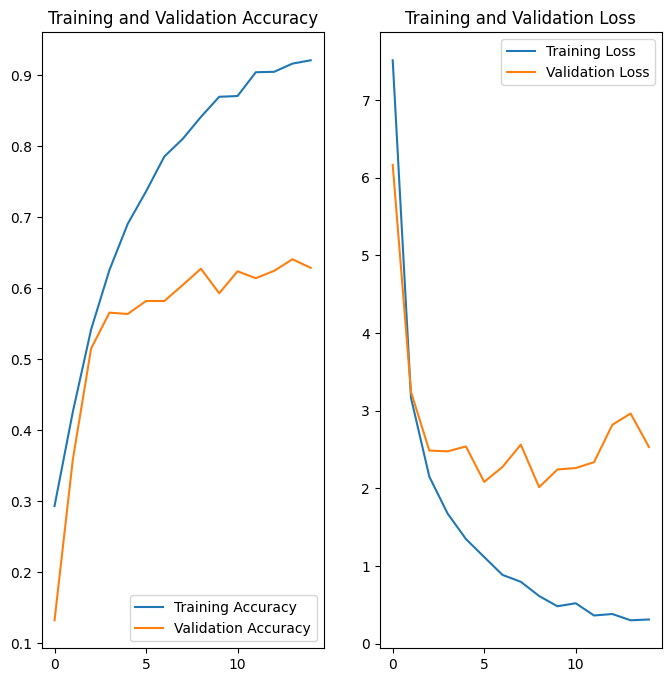

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets
